# Lab 6: KNN from scratch

UIC CS 418, Spring 2023 - CC

## Academic Integrity Policy

According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. 
If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA.

Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

We will run your code through MOSS software to detect copying and plagiarism.

##To submit this assignment:
1. Execute all commands and complete this notebook	
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 6 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 6*. 


### Lab 6: k Nearest Neighbors 

In this assignment, you will implement a K-Nearest Neighbor classifier from scratch and use it on the wine dataset. You are not allowed to use sklearn KNN
learner.

#### 6.1. Implementation (20 pts)


Implement the k-nearest neighbors algorithm. Recall that this simple
algorithm only requires the following steps:

-  Step1: Calculate the distance from test data ( Euclidean distance)
-  Step2: Find the set *I* of *k* observations with smallest distances
-  Step3: Assign a label by taking a majority vote on *I*


**References:**

- [Presentation Slides](https://docs.google.com/presentation/d/1FzOIvXhKBhWwsZ0Hi6-jnYn0SYEYdVop/edit?usp=sharing&ouid=107552658075872219650&rtpof=true&sd=true)
- [Introduction to data Science book (do not use this code because it's using scikit learn)](https://sherbold.github.io/intro-to-data-science/07_Classification.html#$k$-Nearest-Neighbor)


In [1]:
# your code here
import math
from collections import Counter
from operator import itemgetter

def myknn(X_train,X_test,y_train,k):
    #print("started myknn")
    result = []
    '''Step 1: Finding the distances'''
    for xtest in X_test.values: #loop through all test datapoints
        #print("i = ",i)
        distances = {}
        labels = []
        for j, xtrain in enumerate(X_train.values): #loop through all training datapoints and find the distance from the test datapoint
            #print("j =", j)
            #print("xtrain = ",xtrain, "; xtest = ", xtest, "; dist = ", math.dist(xtrain , xtest))
            distances[j] = math.dist(xtrain , xtest) #euclidean distance
            
        '''Step 2: keeping only k smallest distances'''
        distances = dict(sorted(distances.items(), key = itemgetter(1))[:k])
        #print(distances)

        '''Step 3: Taking majority vote'''
        for n,_ in distances.items():
                #print(y_train[n])
                labels.append(y_train[n]) #gets the label corresponding to the training neighbour
        result.append(Counter(labels).most_common(1)[0][0])
    return result

#### 6.2. Wine Dataset (10 pts)

First download the wine dataset from [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). 

The wine dataset is a classic and very easy multi-class classification dataset.

Classes:
3

Samples per class:
[59,71,48]

Samples total:
178

Dimensionality:
13

Features:
real, positive



Before using the data you need to perform two simple tasks:

- Encode the class labels if needed
- Split the dataset into train and test sets. Keep 20% of data for testing and
the rest will be training data. Keep that in mind that in order to get good
results, you need to make sure labels are distributed evenly in train and test
data (stratified sampling). You can use methods provided bysklearn package,
such as train-test-split from sklearncross-validation.

In [2]:
# your code here
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data, target = load_wine(return_X_y=True, as_frame=True)
data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.20,stratify=target, random_state=44)
# restting index so the splits work with the code above
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### 6.3. EDA (10 pts)

- Compare all features distribution in each class using boxplots. 
- Plot a matrix of scatter plots to find any relationships between variables


C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


<Figure size 640x480 with 0 Axes>

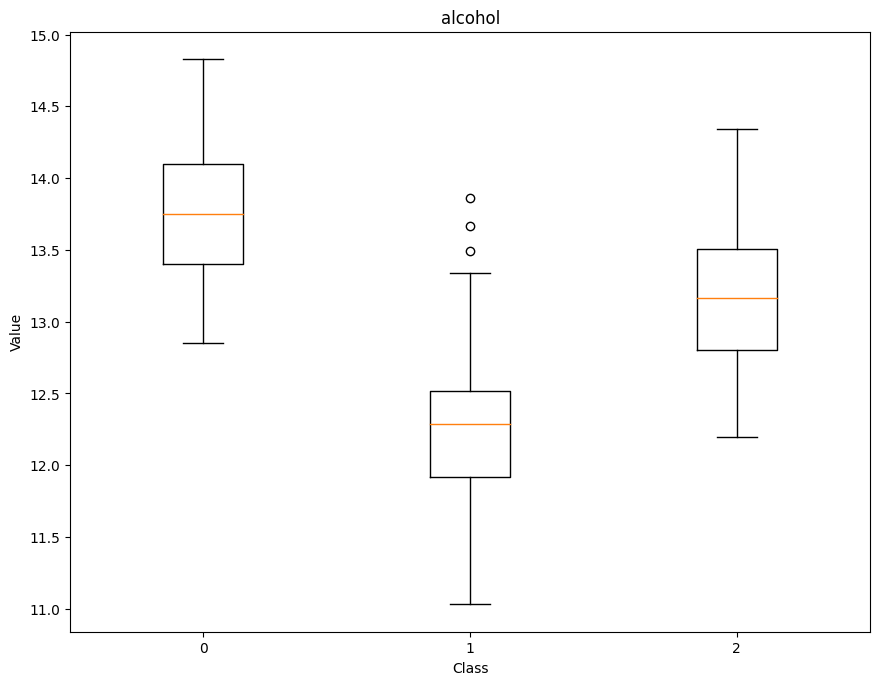

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


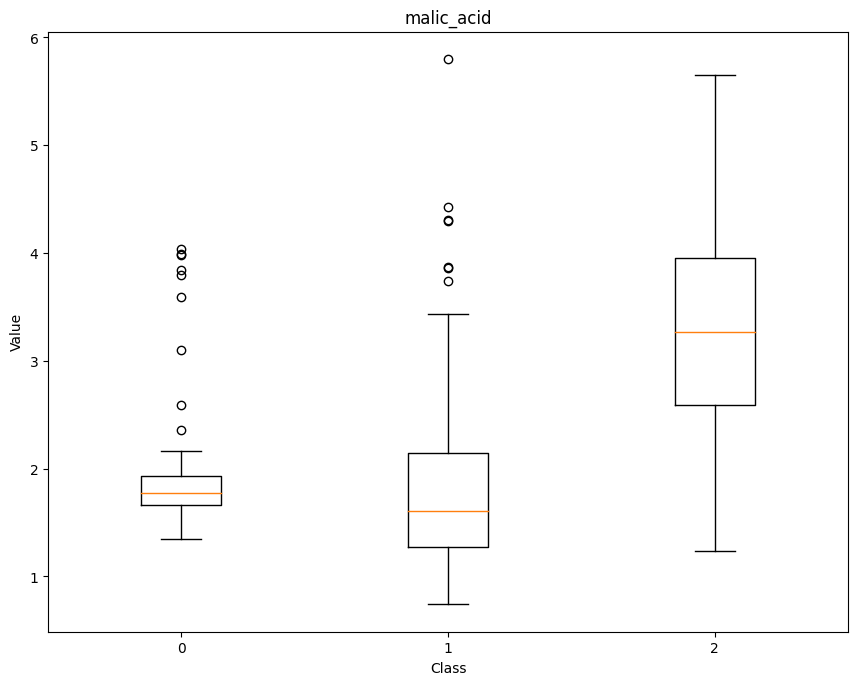

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


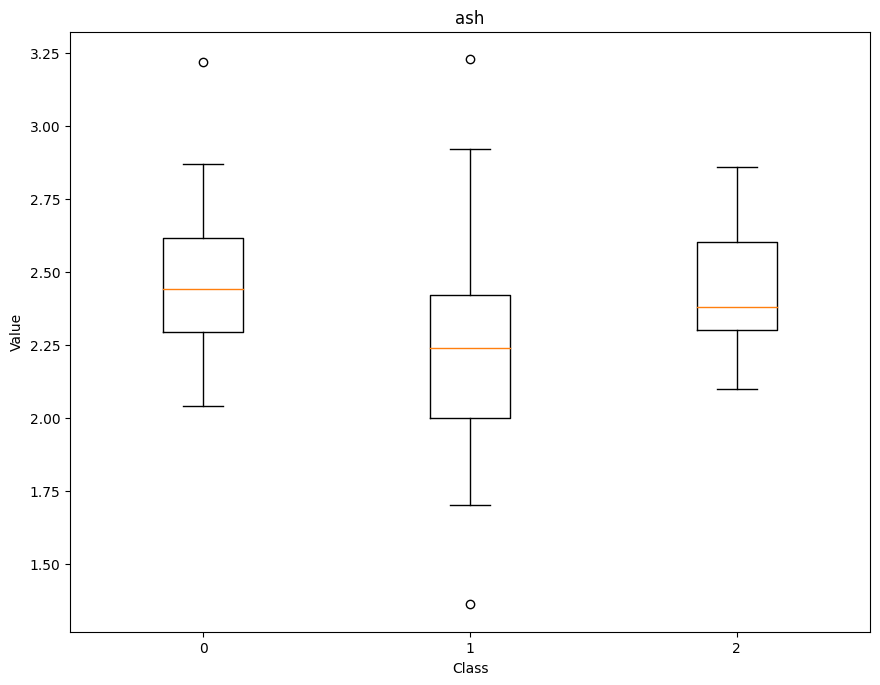

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


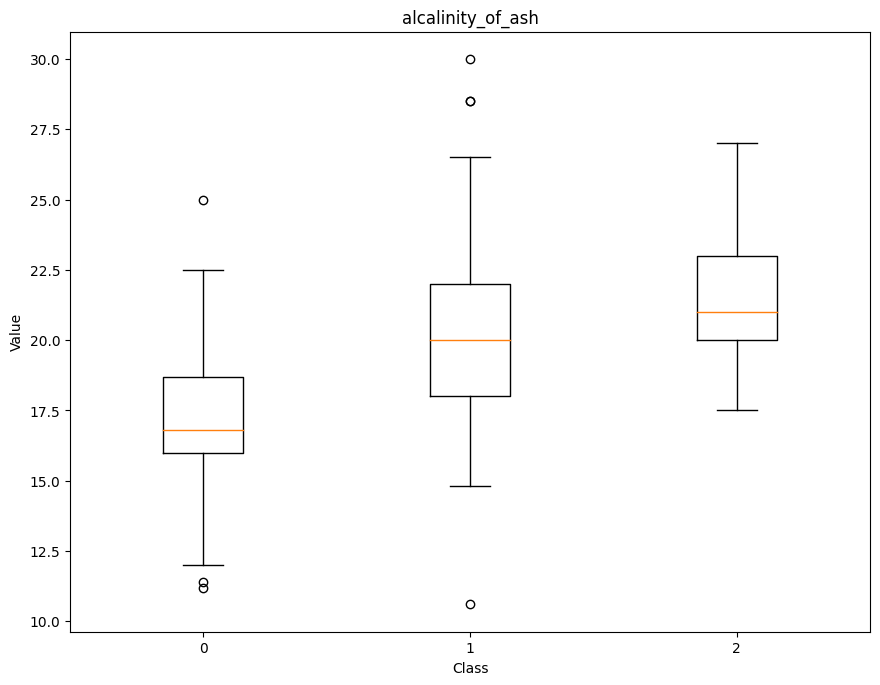

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


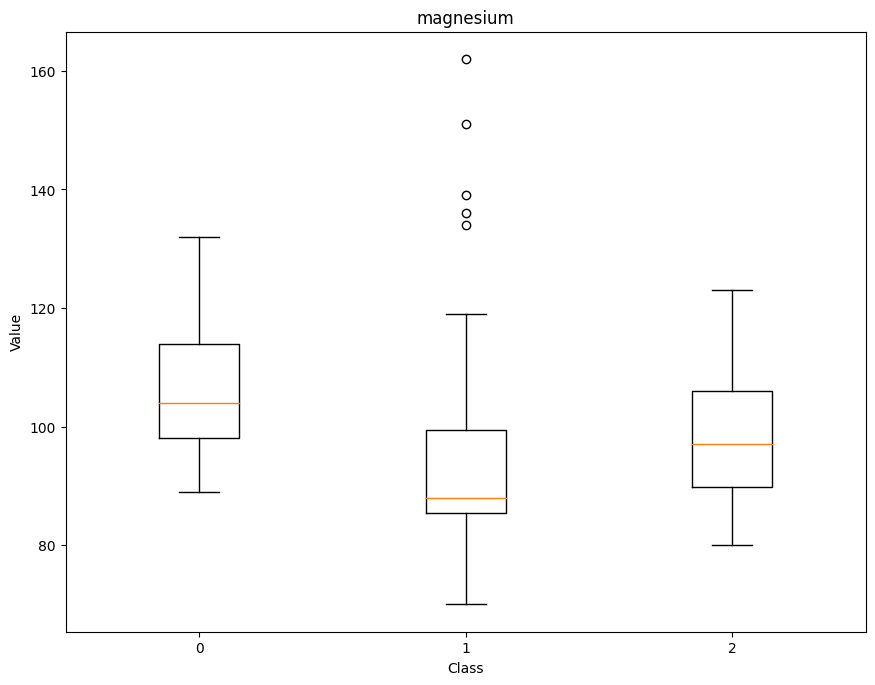

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


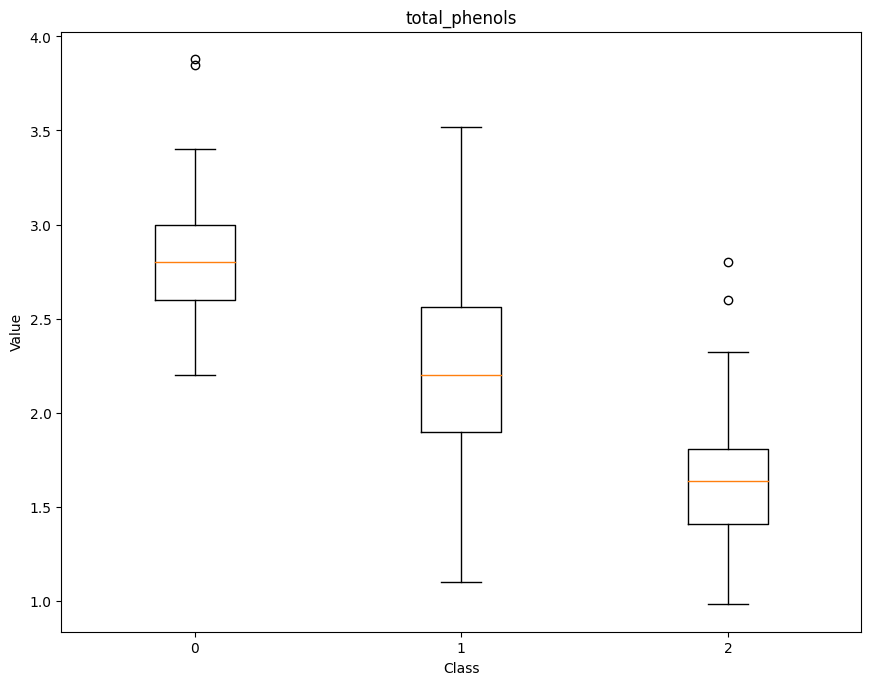

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


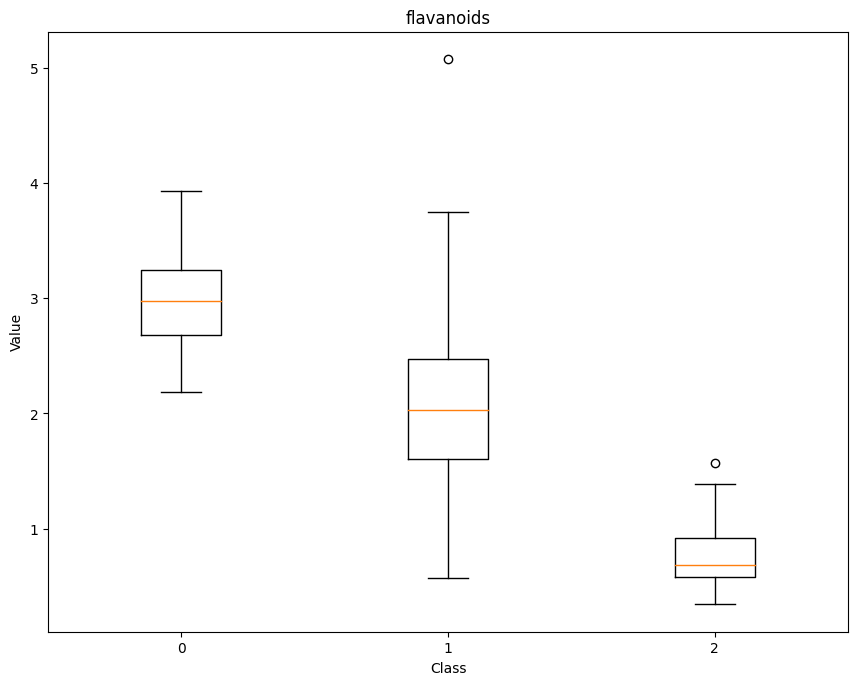

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


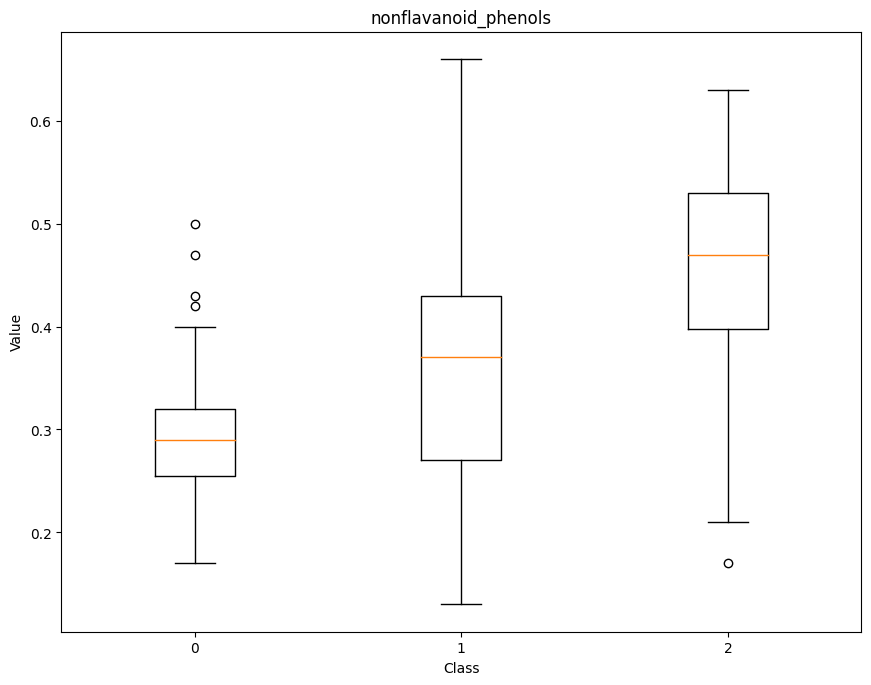

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


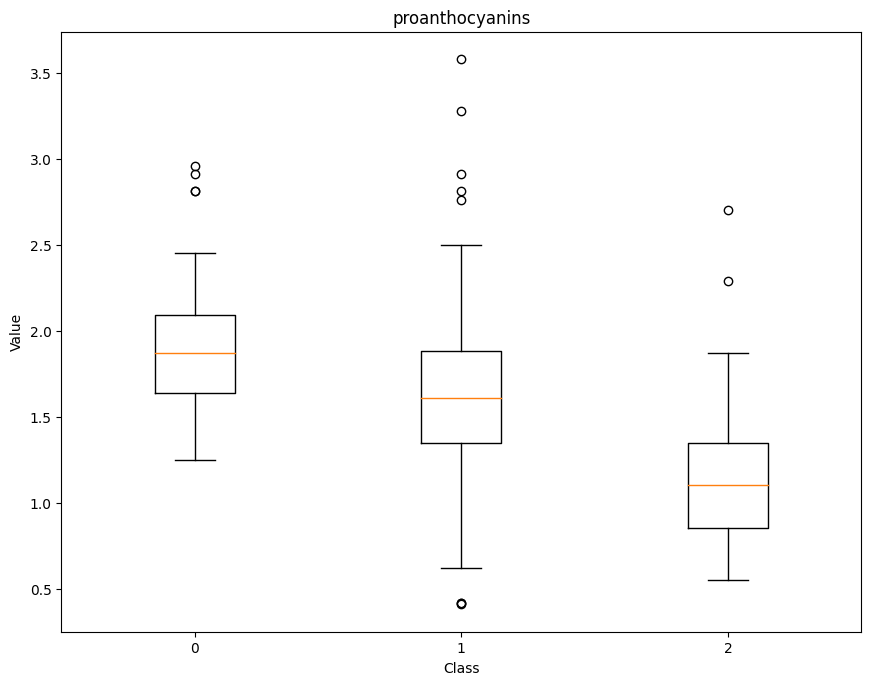

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


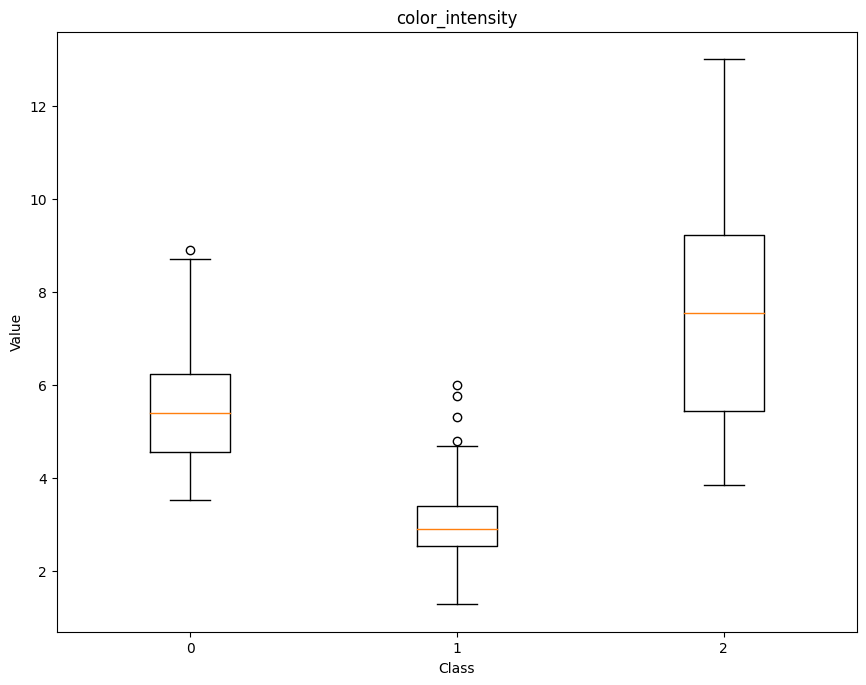

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


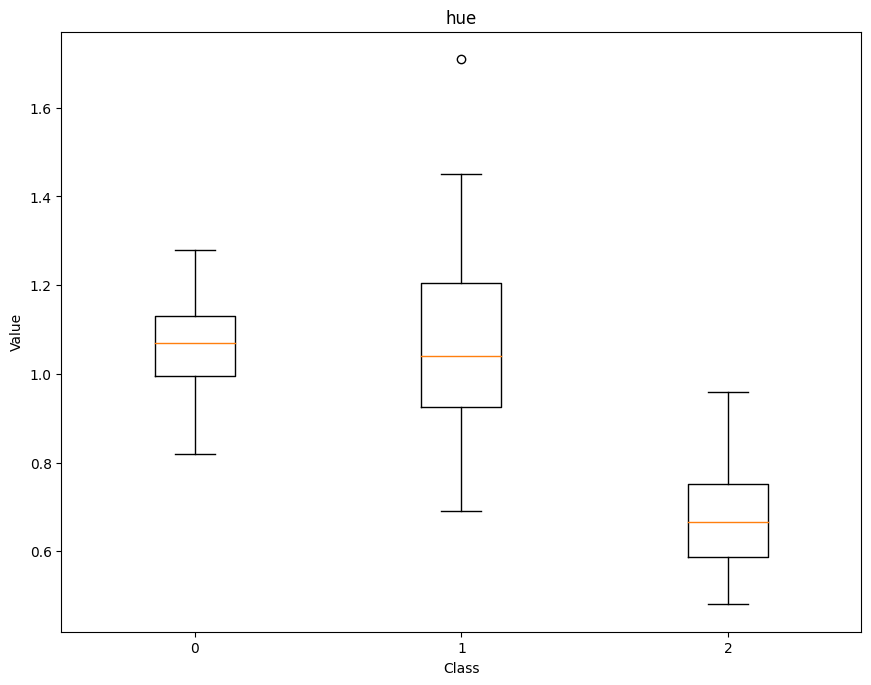

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


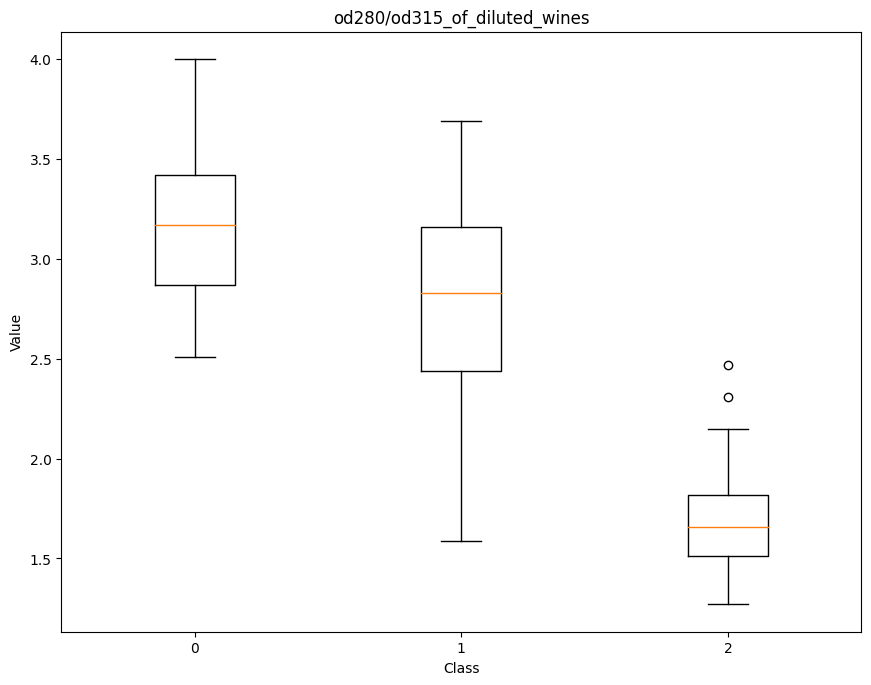

C:\Users\utsav\AppData\Local\Temp\ipykernel_11436\858177324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','1','2'])


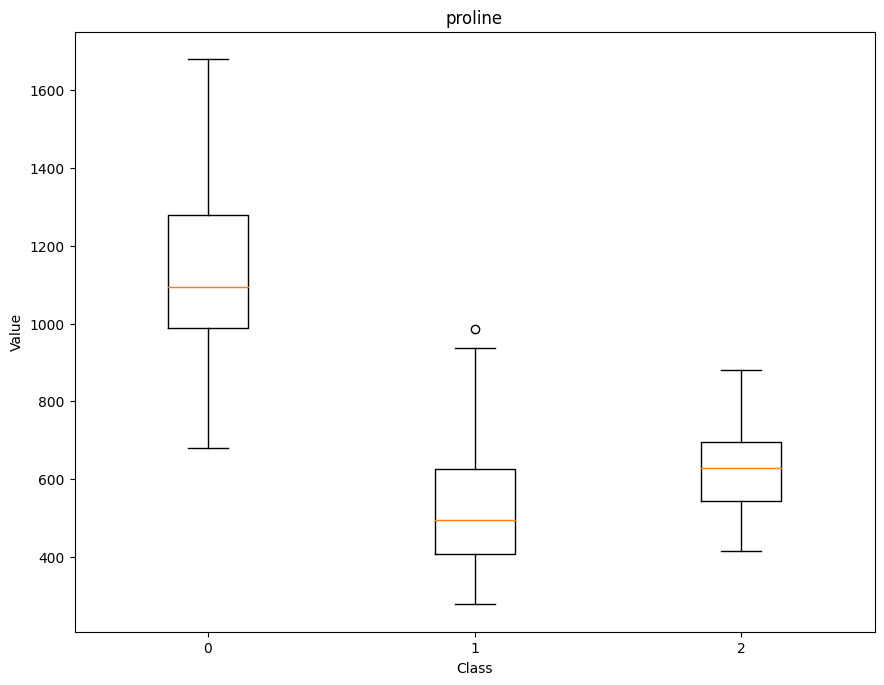

In [4]:
# your code here
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
for n,col in enumerate(data.columns):
    fig = plt.figure(figsize=(4, 3))
    ax=fig.add_axes([0,1,2,2])
    ax.set_xticklabels(['0','1','2'])
    ax.set_xlabel('Class')
    ax.set_ylabel('Value')
    plt.boxplot([data.loc[target == 0][col],data.loc[target == 1][col],data.loc[target == 2][col]])
    plt.title(col)
    plt.show()

array([[<AxesSubplot: xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot: xlabel='malic_acid', ylabel='alcohol'>,
        <AxesSubplot: xlabel='ash', ylabel='alcohol'>,
        <AxesSubplot: xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <AxesSubplot: xlabel='magnesium', ylabel='alcohol'>,
        <AxesSubplot: xlabel='total_phenols', ylabel='alcohol'>,
        <AxesSubplot: xlabel='flavanoids', ylabel='alcohol'>,
        <AxesSubplot: xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <AxesSubplot: xlabel='proanthocyanins', ylabel='alcohol'>,
        <AxesSubplot: xlabel='color_intensity', ylabel='alcohol'>,
        <AxesSubplot: xlabel='hue', ylabel='alcohol'>,
        <AxesSubplot: xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <AxesSubplot: xlabel='proline', ylabel='alcohol'>],
       [<AxesSubplot: xlabel='alcohol', ylabel='malic_acid'>,
        <AxesSubplot: xlabel='malic_acid', ylabel='malic_acid'>,
        <AxesSubplot: xlabel='ash', yla

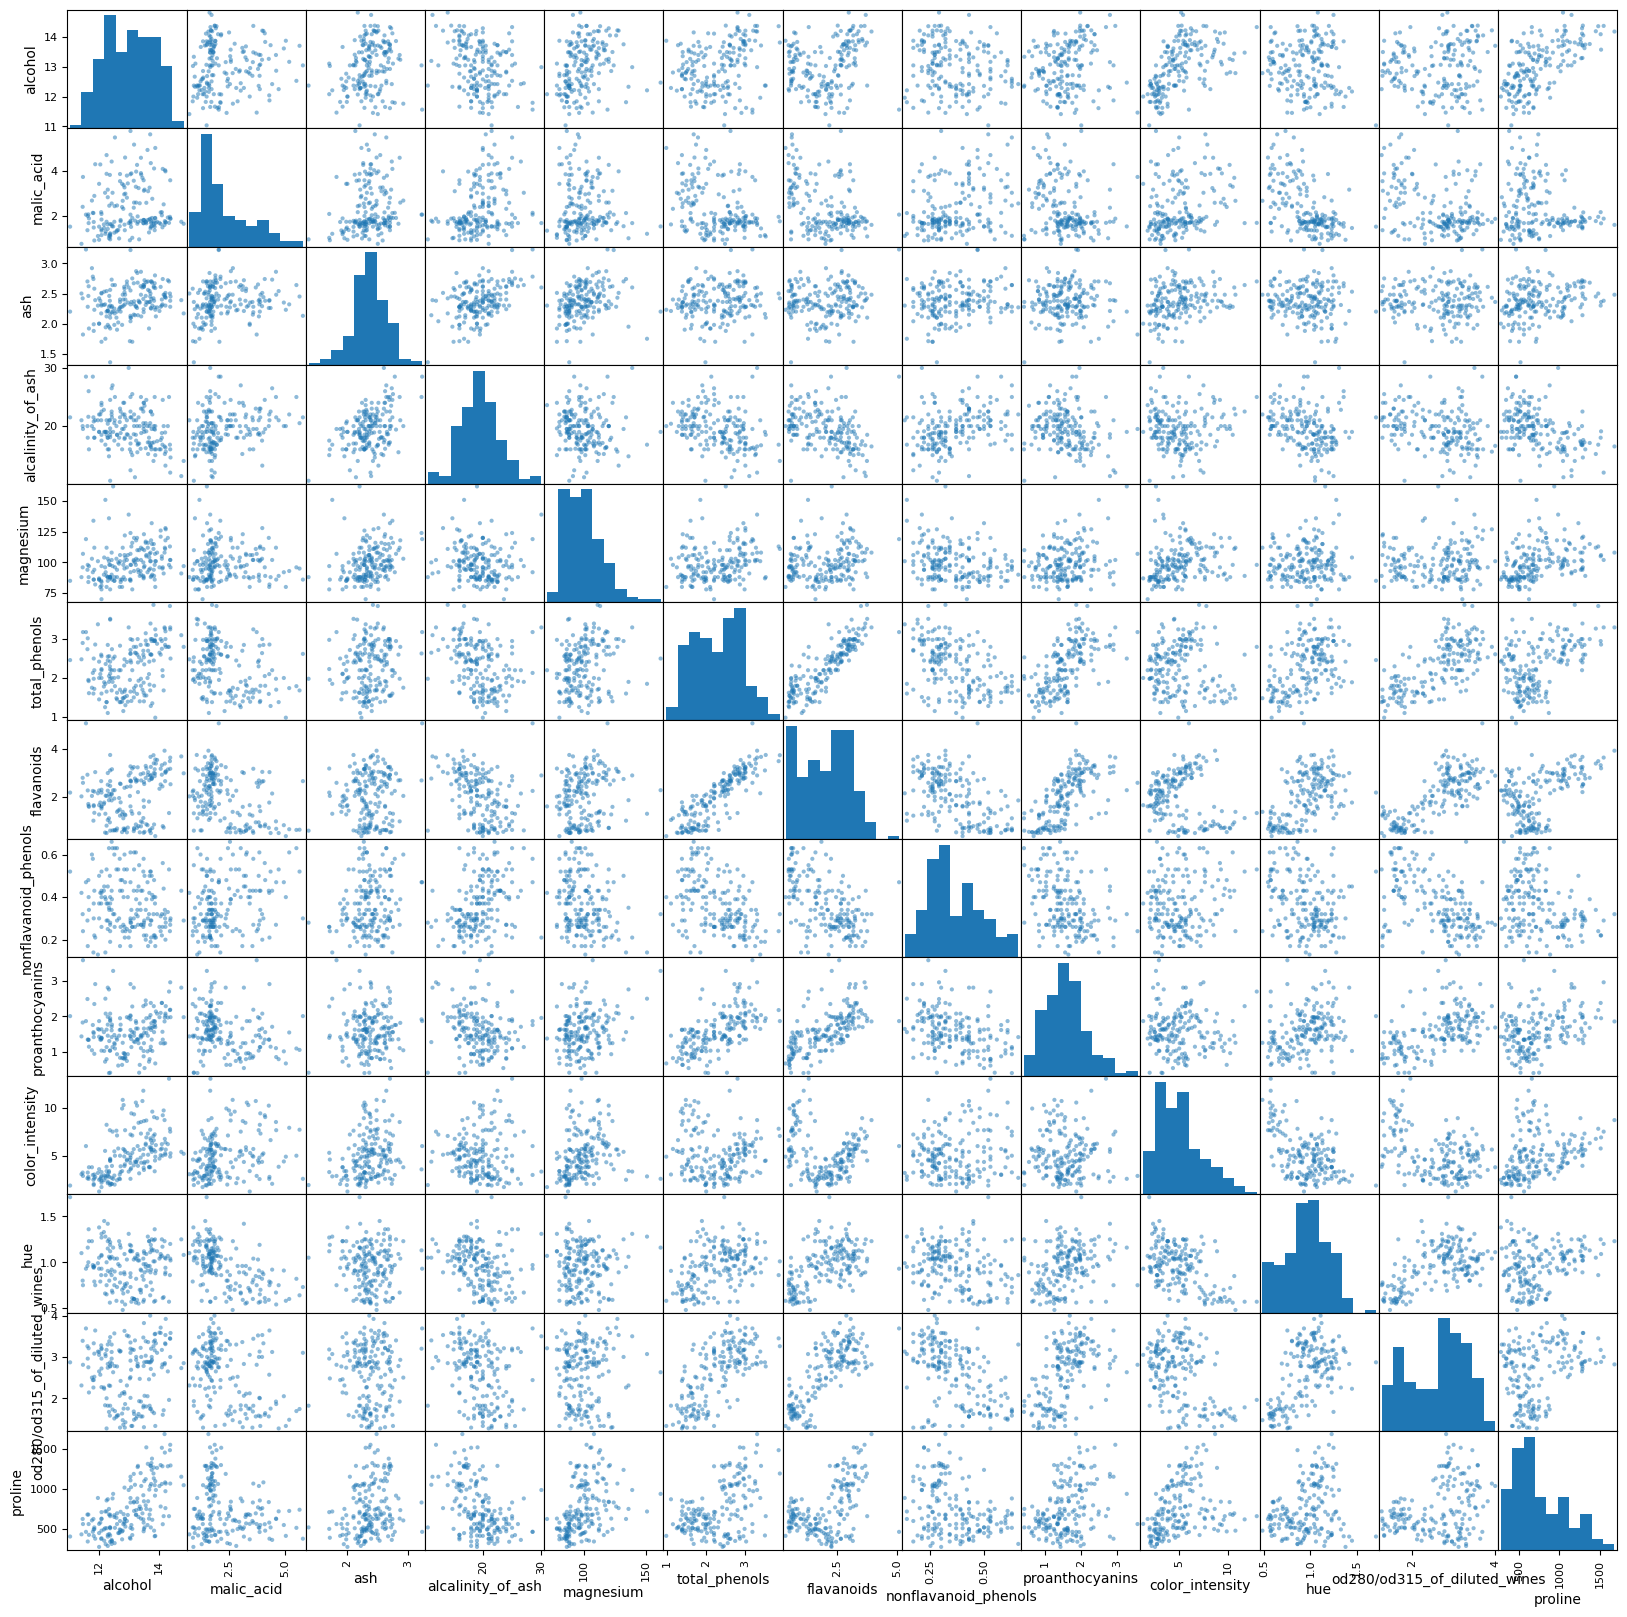

In [5]:
pd.plotting.scatter_matrix(data, figsize=(20,20))

## Your explanations here
Boxplots:

The alcohol content of the class 0 wines has a higher median value than that of class 1 and 2 wines. The class 0 wines also have the highest minimum value for alcohol, with class 1 having the lowest minimum values and class 2 having alcohol content between the two. The same holds true for the maximum value for alcohol as well.

Malic acid has the lowest spread in class 0 wines, with many outliers. Class 1 wines have a slightly larger spread with fewer outliers, and class 2 wines have the largest spread.

The median values of ash are close for the three classes, but class 1 has the largest spread among the three.

The alcalinity of ash has the lowest median value in class 0 wines, and increases in class 1 and 2. Class 0 wines have the lowest values for both the minimum and maximum values out of all 3. Class 1 has few outliers that are higher than class 2 wines too, but the range is spread more widely in general, with the lower end of the values for class 1 lower than that of class 2.

Class 1 wines have the lowest median value for magnesium content in general, but there are outliers that are very high in magnesium content. Class 0 wines have median values that are higher than that of class 1 and 2, and class 2 falls between class 0 and 1.

The median values for total phenols decreases as the class increases, but class 1 ones have the largest range of values by far.

The same holds true for flavanoids, where the median value of flavanoids content decreases as the class increases. the Q1 and Q3 values also follow the same pattern in this case.

Nonfalvanoid phenols have a median value that increases by class, and class 1 has the highest range of values.

Proanthocyanins have median values that decrease with increase in class, and class 1 has the most outliers, with some outliers higher than either of the other two classes.

Class 2 wines have the highest range of color_intensity, and the highest median value as well. Class 1 wines have the lowest range and median values, and class 0 falls between the other 2 classes.

Class 0 and 1 wines have median values of hue that is pretty close, but class 1 has the higher range. Class 2 wines have the lowest median value, and the lowest Q1/Q3 values as well.

The median values of od280/od315 also decrease with increase in class, with class 1 having the highest range of values.

Class 0 wines have the highest median value and range of proline, with class 2 having the lowest range, but median value higher than class 1, which has a range between class 0 and 1.



The alcohol content in class 0 is slightly less than that in classes 1 and 2.
The range of malic acid increases with the class, where class 0 has the lowest range, and class 2 has the highest range.
Ash remains almost the same across the board.
Class 0 wines have a lower spread of alcalinity of ash with some outliers. Class 1 has a higher spread of values with some outliers, while class 2 has a spread aproxximately between the two, and with no outliers.
All classes have almost the same magnesium content, but class 1 has a few outliers.
The wines in class 0 have very high proline, which decreases in wines with class 1, and is the lowest in class 2. Class 1 wines also have the median value as the lowest among the classes for proline.
The rest of the features are aprroximately similarly spread across the classes.

Scatter Matrix:

The relationship between alcohol and most of the other features is pretty scattered, with the exception of proline. Lower alcohol content means that the level of phenols in the wine is also low, and grows somewhat linearly with the increase in alcohol content.

Malic Acid remains pretty low across the board, with most of the points in the plot concentrated towards the lower end of malic acid regardless of the other features.

The ash content in wine remains clustered around the center regardless of the other features.

Alcalinity of Ash is also clustered around the center with respect to other features, but the datapoints are more scattered than Ash.

Magnesium content is somewhat clustered around the low end in relation to other features, but we see a fairly high distribution of points across the board.

We can see total_phenols has a linear relationship with almost all other features, where increase in one causes an increase in the other. The only feature that has an inverse linear relationship is nonflavanoid phenols, which decrease with increase in total_phenols.

Falavanoids also have a linear od280/od315, proline, hue, color intensity, proanthocyanins and total phenols.

The other relationships are very scattered to draw a solid inference from.
 

#### 6.4. Train the data using your implementation of knn.  (10 pts)

Start with k = 1, plot the decision boundary using the first two features and report the accuracy on the test data.

Runtime =  0.016403675079345703
k =  1  Accuracy =  0.7777777777777778
Confusion Matrix:
[[12  0  0]
 [ 1 11  2]
 [ 0  5  5]]


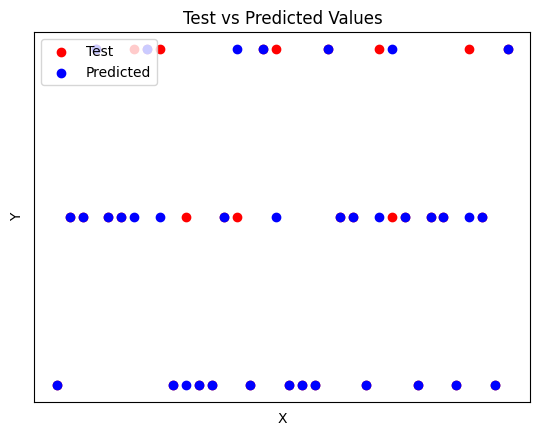

In [6]:
 #your code here
import time
from sklearn.metrics import accuracy_score, confusion_matrix

start = time.time()
y_pred_1 = myknn(X_train, X_test, y_train, 1)
end = time.time()
print("Runtime = ", end-start)
print("k = ", 1 , " Accuracy = ", accuracy_score(y_test, y_pred_1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))
#plot
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred_1, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()


## Your explanations here

For K=1, the algorithm has an accuracy of 0.77


#### 6.5. Perform the prediction using k = 2, 4, 6, 10 and plot the accuracy versus k graph.  (40 pts)

How does the decision boundary change by increasing the number of neighbors?
(plot the decision boundaries and data points to compare)


For all cases, report accuracy and confusion matrix.


In [7]:
results = pd.DataFrame(columns=['k','accuracy'])

Runtime =  0.008330345153808594
k =  2  Accuracy =  0.7777777777777778
Confusion Matrix:
[[12  0  0]
 [ 1 11  2]
 [ 0  5  5]]


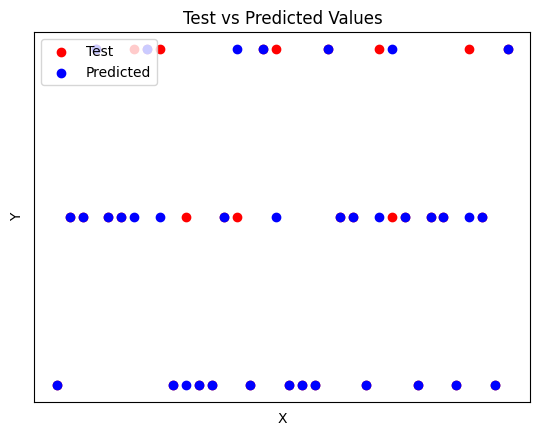

In [8]:
 #your code here
k=2
start = time.time()
y_pred_2 = myknn(X_train, X_test, y_train, k)
end = time.time()
print("Runtime = ", end-start)
acc = accuracy_score(y_test, y_pred_2)
print("k = ", 2 , " Accuracy = ", acc)
results.loc[len(results.index)] = [k,acc]
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))
#plot
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred_2, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()

Runtime =  0.010423898696899414
k =  4  Accuracy =  0.8055555555555556
Confusion Matrix:
[[12  0  0]
 [ 1 12  1]
 [ 1  4  5]]


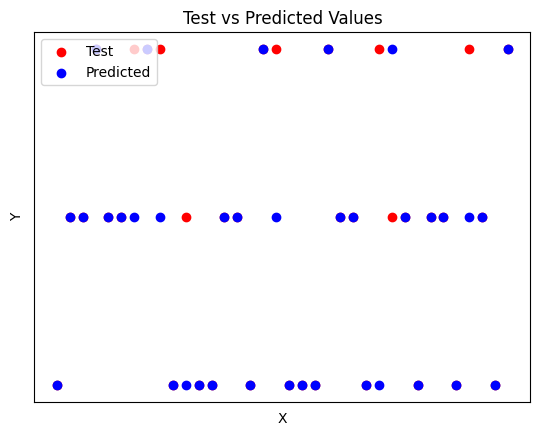

In [9]:
k=4
start = time.time()
y_pred_4 = myknn(X_train, X_test, y_train, k)
end = time.time()
print("Runtime = ", end-start)
acc = accuracy_score(y_test, y_pred_4)
print("k = ", k , " Accuracy = ", acc)
results.loc[len(results.index)] = [k,acc]
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_4))
#plot
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred_4, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()

Runtime =  0.010034322738647461
k =  6  Accuracy =  0.8333333333333334
Confusion Matrix:
[[12  0  0]
 [ 1 11  2]
 [ 1  2  7]]


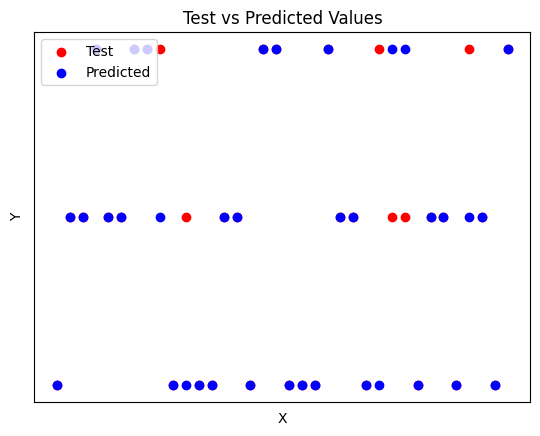

In [10]:
k=6
start = time.time()
y_pred_6 = myknn(X_train, X_test, y_train, k)
end = time.time()
print("Runtime = ", end-start)
acc = accuracy_score(y_test, y_pred_6)
print("k = ", k , " Accuracy = ", acc)
results.loc[len(results.index)] = [k,acc]
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_6))
#plot
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred_6, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()

Runtime =  0.011019706726074219
k =  10  Accuracy =  0.7222222222222222
Confusion Matrix:
[[12  0  0]
 [ 1  9  4]
 [ 2  3  5]]


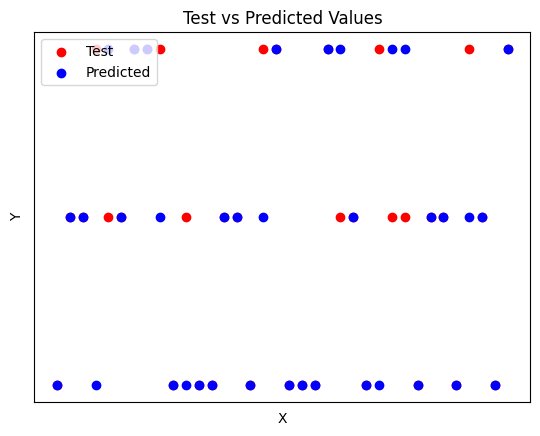

In [11]:
k=10
start = time.time()
y_pred_10 = myknn(X_train, X_test, y_train, k)
end = time.time()
print("Runtime = ", end-start)
acc = accuracy_score(y_test, y_pred_10)
print("k = ", k , " Accuracy = ", acc)
results.loc[len(results.index)] = [k,acc]
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_10))
#plot
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred_10, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()

Text(0.5, 1.0, 'Accuracy vs K')

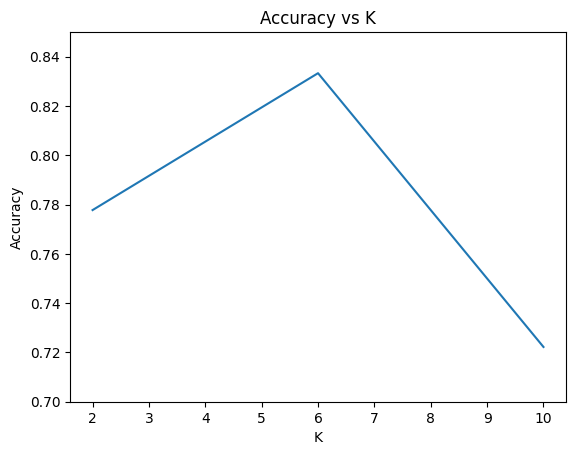

In [12]:
#results.head()
plt.plot(results.k,results.accuracy)
plt.ylim(0.7,0.85)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")

#### 6.6 Use sklearns implementation of knn (10 pts)

Take the value of K which gives the best accuracy from the previous question and train an sklearn knn classifier using that K. Compare the performance of your implementation with sklearn (in terms of accuracy and speed).

Runtime =  0.0020568370819091797
k =  6  Accuracy =  0.8055555555555556
Confusion Matrix:
[[12  0  0]
 [ 1 11  2]
 [ 2  2  6]]


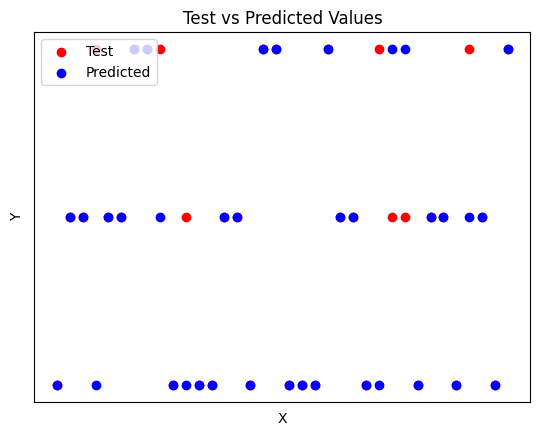

In [13]:
#your code here
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(X_train, y_train)
start = time.time()
y_pred_sklearn = clf.predict(X_test)
end = time.time()
print("Runtime = ", end-start)
print("k = ", 6 , " Accuracy = ", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))
#plot
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred_sklearn, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()


## Your explanations here

#### My KNN Algorithm:
Runtime: 0.010
Accuracy: 0.833
#### SKLearn KNN:
Runtime: 0.002
Accuracy: 0.805

From these results, we can see that while my KNN algorithm is marginally more accurate than the SKLearn KNN algorithm, it is 5 times slower when it comes to the runtime. In this case, the tradeoff for the extra 3% performance is not worth the 5x increase in runtime. 